# Overview 

In this final project, we will be predicting the price of used cars given the data collected from various sources and distributed across various locations in India.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load and Describe Data

## Load Data

In [2]:
df_initial = pd.read_csv('used_car_data.csv')

In [3]:
df = pd.read_csv('used_car_data.csv')

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


## Data Description

In [6]:
df.shape

(6019, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


### Numerical Data

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(df.select_dtypes(include=numerics).columns)
df.select_dtypes(include=numerics).head()

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


### Non Numerical Data

In [9]:
display(df.select_dtypes(include=['object']).columns)
display(df.select_dtypes(include=['object']).head())

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


## Check Null and Missing Values

In [10]:
df_null = df.isnull().sum().reset_index()
df_null.columns = ['feature','missing_value']
df_null['percentage'] = round((df_null['missing_value']/len(df))*100,2)
df_null = df_null.sort_values('percentage', ascending=False).reset_index(drop=True)
df_null

,feature,missing_value,percentage
0,Seats,42,0.70
1,Engine,36,0.60
2,Power,36,0.60
3,Mileage,2,0.03
4,Name,0,0.00
5,Location,0,0.00
6,Year,0,0.00
7,Kilometers_Driven,0,0.00
8,Fuel_Type,0,0.00
9,Transmission,0,0.00


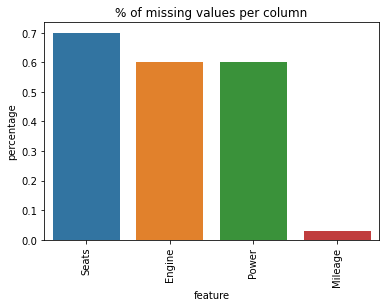

In [11]:
ax = sns.barplot(x='feature',y='percentage', data=df_null[df_null.percentage>0])
ax.set_title('% of missing values per column')
for item in ax.get_xticklabels():
    item.set_rotation(90)

# Exploratory Data Analysis

## Feature Engineering / Data Preprocessing

**Check Feature 'Name'**

In [12]:
df.Name[:5]

0              Maruti Wagon R LXI CNG
1    Hyundai Creta 1.6 CRDi SX Option
2                        Honda Jazz V
3                   Maruti Ertiga VDI
4     Audi A4 New 2.0 TDI Multitronic
Name: Name, dtype: object

In [13]:
# Separate Car Brand and Model in two separate columns
df['Brand'] = df['Name'].apply(lambda x: x.split(" ")[0])
df['Model'] = df['Name'].apply(lambda x: " ".join(x.split(" ")[1:]))

# Drop the Name column after adding the 2 new columns
df.drop(labels=['Name'], axis=1, inplace=True)

**Check Feature 'Year'**

In [14]:
# Change to car age
import datetime as dt
df['Year_Age'] = dt.date.today().year - df['Year']
df.drop(labels=['Year'], axis=1, inplace=True)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon R LXI CNG,10
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,5
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz V,9
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga VDI,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,7


###  Filling Missing Values

#### Feature 'Mileage'

In [15]:
df[df['Mileage'].isna()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
4446,Chennai,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,Mahindra,E Verito D4,4
4904,Mumbai,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,Toyota,Prius 2009-2016 Z4,9


In [16]:
# Two 'Mileage' missing values for Toyota Prius and Mahindra e-Verito
# Looked up the car's spec in internet and got the data to fill
# create a function to filter Brand column and fill in missing values
def fillmiss_df_mileage(car_name,value):
    indx = df[(df['Mileage'].isna()) & (df['Brand'] == car_name)]['Mileage'].index
    df['Mileage'][indx] = value

In [17]:
# Fill missing values for mileage using its created function
fillmiss_df_mileage('Mahindra','110 kmpl')
fillmiss_df_mileage('Toyota','23.91 kmpl')

In [18]:
L=[4446,4904]
df.loc[L]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
4446,Chennai,50000,Electric,Automatic,First,110 kmpl,72 CC,41 bhp,5.0,13.00,Mahindra,E Verito D4,4
4904,Mumbai,44000,Electric,Automatic,First,23.91 kmpl,1798 CC,73 bhp,5.0,12.75,Toyota,Prius 2009-2016 Z4,9


In [19]:
df_Mileage_null = df.loc[df.Mileage == '0.0 kmpl']
df_Mileage_null

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
14,Pune,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,Land,Rover Freelander 2 TD4 SE,8
67,Coimbatore,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.67,Mercedes-Benz,C-Class Progressive C 220d,1
79,Hyderabad,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30,Hyundai,Santro Xing XL,15
194,Ahmedabad,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda,City 1.5 GXI,13
229,Bangalore,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60,Ford,Figo Diesel,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Mumbai,227000,Diesel,Manual,Fourth & Above,0.0 kmpl,2446 CC,null bhp,8.0,2.20,Toyota,Qualis Fleet A3,19
5875,Ahmedabad,4000,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.00,Mercedes-Benz,C-Class Progressive C 220d,1
5943,Chennai,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70,Mahindra,Jeep MM 540 DP,18
5972,Mumbai,65000,Petrol,Manual,Second,0.0 kmpl,1086 CC,62 bhp,5.0,1.39,Hyundai,Santro Xing GL,12


In [20]:
#create a function to filter Brand column and replace 0.0 kmpl values
def fillzero_df(col_name,col_filter_name,car_name,value1):
    indx = df[(df[col_name] == '0.0 kmpl') & (df[col_filter_name] == car_name)][col_name].index
    df[col_name][indx] = value1

In [21]:
# Looked up the car's specification in internet and use the data to fill
# input null kmpl values based on Brand filter
fillzero_df('Mileage','Brand','Land','12.39 kmpl')
fillzero_df('Mileage','Brand','Mercedes-Benz','15.26 kmpl')
fillzero_df('Mileage','Brand','Hyundai','20.3 kmpl')
fillzero_df('Mileage','Brand','Honda','12.8 kmpl')
fillzero_df('Mileage','Brand','Ford','24.4 kmpl')
fillzero_df('Mileage','Brand','Volkswagen','15.5 kmpl')
fillzero_df('Mileage','Brand','Smart','30.3 kmpl')
fillzero_df('Mileage','Brand','Maruti','23.87 kmpl')
fillzero_df('Mileage','Brand','Mahindra','17 kmpl')
fillzero_df('Mileage','Brand','Toyota','13.2 kmpl')
fillzero_df('Mileage','Brand','Skoda','12.0 kmpl')
fillzero_df('Mileage','Brand','Audi','13.88 kmpl')
fillzero_df('Mileage','Brand','Fiat','15.5 kmpl')

In [22]:
df.loc[df.Mileage == '0.0 kmpl']

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age


#### Feature 'Engine' and 'Power'

In [23]:
df[df['Engine'].isna()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
194,Ahmedabad,60006,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,2.95,Honda,City 1.5 GXI,13
208,Kolkata,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti,Swift 1.3 VXi,10
733,Chennai,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti,Swift 1.3 VXi,14
749,Mumbai,55001,Diesel,Automatic,Second,12.39 kmpl,NaN,NaN,NaN,26.50,Land,Rover Range Rover 3.0 D,12
1294,Delhi,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20,Honda,City 1.3 DX,11
1327,Hyderabad,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80,Maruti,Swift 1.3 ZXI,5
1385,Pune,115000,Petrol,Manual,Second,12.8 kmpl,NaN,NaN,NaN,1.50,Honda,City 1.5 GXI,16
1460,Coimbatore,69078,Petrol,Manual,First,12.39 kmpl,NaN,NaN,NaN,40.88,Land,Rover Range Rover Sport 2005 2012 Sport,12
2074,Pune,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15,Maruti,Swift 1.3 LXI,9
2096,Coimbatore,52146,Petrol,Manual,First,20.3 kmpl,NaN,NaN,NaN,1.93,Hyundai,Santro LP zipPlus,16


In [24]:
#create a function to filter Brand and Model column and fill in missing values
def fillmiss_df(col_name,col_name2,col_filter_name,car_name,value1,value2):
    indx = df[(df[col_name].isna()) & (df[col_filter_name] == car_name)][col_name].index
    df[col_name][indx] = value1
    df[col_name2][indx] = value2

In [25]:
# Looked up the car's spec in internet and got the data to fill
# Firstly input missing values based on Brand filter
fillmiss_df('Engine','Power','Brand','Honda','1493 CC','100 bhp')
fillmiss_df('Engine','Power','Brand','Land','2995 CC', '335.25 bhp')
fillmiss_df('Engine','Power','Brand','Toyota','1197 CC','78.9 bhp')
fillmiss_df('Engine','Power','Brand','BMW','1995 CC', '188 bhp')
fillmiss_df('Engine','Power','Brand','Hyundai','1086 CC','62 bhp')
fillmiss_df('Engine','Power','Brand','Maruti','1197 CC','81.8 bhp')

#Next input missing values based on Model filter
fillmiss_df('Engine','Power','Model','Punto 1.3 Emotion','1248 CC','75 bhp')
fillmiss_df('Engine','Power','Model','Punto 1.4 Emotion','1368 CC','88 bhp')
fillmiss_df('Engine','Power','Model','Punto 1.2 Dynamic','1172 CC','67 bhp')

In [26]:
df['Engine'].isna().sum()

0

In [27]:
df['Power'].isna().sum()

0

In [28]:
## Check cars with Engine = null bhp
df_Power_null = df.loc[df.Power == 'null bhp']
df_Power_null.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
76,Jaipur,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00,Ford,Fiesta 1.4 SXi TDCi,12
79,Hyderabad,87591,Petrol,Manual,First,20.3 kmpl,1086 CC,null bhp,5.0,1.30,Hyundai,Santro Xing XL,15
89,Hyderabad,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10,Hyundai,Santro Xing XO,13
120,Mumbai,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85,Hyundai,Santro Xing XL eRLX Euro III,15
143,Kochi,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67,Hyundai,Santro Xing XO eRLX Euro II,12


In [29]:
#create a function to filter Brand column and replace null bhp values
def fillnull_df(col_name,col_filter_name,car_name,value1):
    indx = df[(df[col_name] == 'null bhp') & (df[col_filter_name] == car_name)][col_name].index
    df[col_name][indx] = value1

In [30]:
# Looked up the car's specification in internet and use the data to fill
# input null bhp values based on Brand filter
fillnull_df('Power','Brand','Ford','68 bhp')
fillnull_df('Power','Brand','Hyundai','62 bhp')
fillnull_df('Power','Brand','Maruti','81.8 bhp')
fillnull_df('Power','Brand','Volkswagen','89 bhp')
fillnull_df('Power','Brand','Tata','53.5 bhp')
fillnull_df('Power','Brand','Toyota','78.9 bhp')
fillnull_df('Power','Brand','Smart','44 bhp')
fillnull_df('Power','Brand','Porsche','320 bhp')
fillnull_df('Power','Brand','Fiat','72 bhp')
fillnull_df('Power','Brand','Chevrolet','104 bhp')
fillnull_df('Power','Brand','Mahindra','70 bhp')
fillnull_df('Power','Brand','Nissan','63 bhp')
fillnull_df('Power','Brand','Mercedes-Benz','155 bhp')
fillnull_df('Power','Brand','Honda','100 bhp')
fillnull_df('Power','Brand','Audi','253 bhp')
fillnull_df('Power','Brand','Skoda','158 bhp')

In [31]:
df.loc[df.Power == 'null bhp']

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age


#### Feature 'Seats'

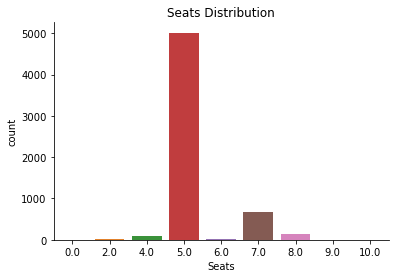

In [32]:
sns.countplot(x = df['Seats'])
plt.xlabel('Seats')
plt.title('Seats Distribution')
sns.despine()

Most of cars in dataset have 5 Seats

In [33]:
df[df['Seats'].isna()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
194,Ahmedabad,60006,Petrol,Manual,First,12.8 kmpl,1493 CC,100 bhp,NaN,2.95,Honda,City 1.5 GXI,13
208,Kolkata,42001,Petrol,Manual,First,16.1 kmpl,1197 CC,81.8 bhp,NaN,2.11,Maruti,Swift 1.3 VXi,10
229,Bangalore,70436,Diesel,Manual,First,24.4 kmpl,1498 CC,99 bhp,NaN,3.60,Ford,Figo Diesel,5
733,Chennai,97800,Petrol,Manual,Third,16.1 kmpl,1197 CC,81.8 bhp,NaN,1.75,Maruti,Swift 1.3 VXi,14
749,Mumbai,55001,Diesel,Automatic,Second,12.39 kmpl,2995 CC,335.25 bhp,NaN,26.50,Land,Rover Range Rover 3.0 D,12
1294,Delhi,55005,Petrol,Manual,First,12.8 kmpl,1493 CC,100 bhp,NaN,3.20,Honda,City 1.3 DX,11
1327,Hyderabad,50295,Petrol,Manual,First,16.1 kmpl,1197 CC,81.8 bhp,NaN,5.80,Maruti,Swift 1.3 ZXI,5
1385,Pune,115000,Petrol,Manual,Second,12.8 kmpl,1493 CC,100 bhp,NaN,1.50,Honda,City 1.5 GXI,16
1460,Coimbatore,69078,Petrol,Manual,First,12.39 kmpl,2995 CC,335.25 bhp,NaN,40.88,Land,Rover Range Rover Sport 2005 2012 Sport,12
1917,Jaipur,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70,Honda,City 1.5 EXI,15


In [34]:
df.loc[df.Seats == 0]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
3999,Hyderabad,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,253 bhp,0.0,18.0,Audi,A4 3.2 FSI Tiptronic Quattro,8


In [35]:
#fill Seats missing values and 0 with 5
df['Seats'].fillna(value = 5, inplace  = True)
df['Seats'] = df.Seats.replace(0,5)

In [36]:
df['Seats'].isna().sum()

0

In [37]:
df.loc[df.Seats == 0]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age


### Convert String to Numeric

In [38]:
# Extract int / float from object

In [39]:
import re

def get_number(name):
    title_search = re.search('([\d+\.+\d]+\W)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [40]:
df['Mileage'] = df['Mileage'].apply(get_number).astype('float')
df['Engine'] = df['Engine'].apply(get_number).astype('int')
df['Power'] = df['Power'].apply(get_number).astype('float')

In [41]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age
0,Mumbai,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,10
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,5
2,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz V,9
3,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,7


## Data Visualization

### Analysis of features with reference to number of cars

#### Top Car Brand

Text(0.5, 1.0, 'Count of cars based on brand')

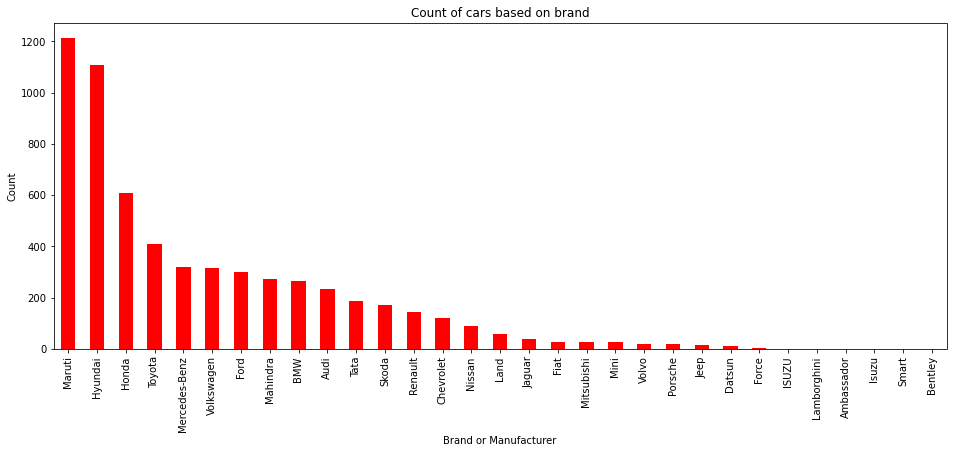

In [42]:
plt.figure(figsize=(16,6))
pd.value_counts(df['Brand']).plot.bar(color='r')
plt.xlabel("Brand or Manufacturer")
plt.ylabel("Count")
plt.title("Count of cars based on brand")

As per plot, Maruti is the leading car brand, followed by Hyundai. 

Also we can see that Lamborghini, Ambassador, Bentley, Isuzu, and Smart have the least numbers of cars in dataset

#### Car Age

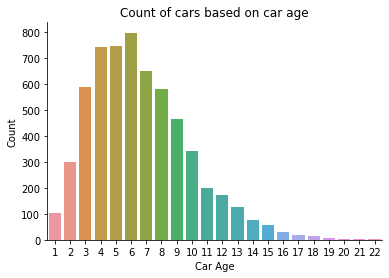

In [43]:
sns.countplot(x = df['Year_Age'])
plt.xlabel('Car Age')
plt.ylabel("Count")
plt.title('Count of cars based on car age')
sns.despine()

Text(0.5, 1.0, 'Count of cars based on car age')

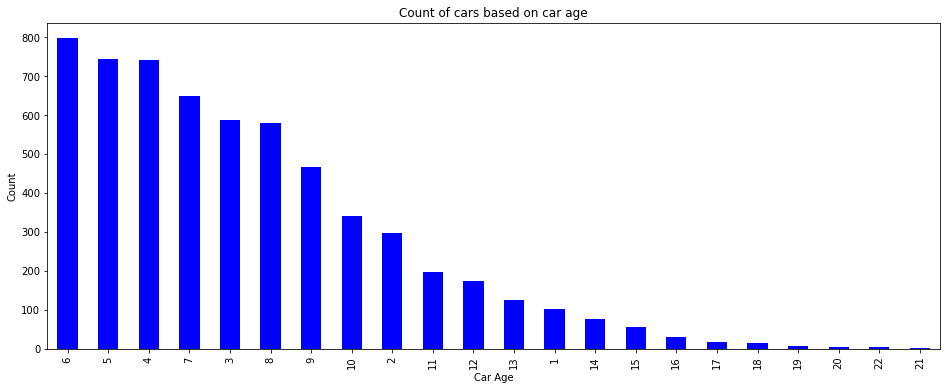

In [44]:
plt.figure(figsize=(16,6))
pd.value_counts(df['Year_Age']).plot.bar(color='b')
plt.xlabel("Car Age")
plt.ylabel("Count")
plt.title("Count of cars based on car age")

Most number of cars in the dataset are built between 2010 to 2017 (age 3-10)

#### Analysis of other features with reference to number of cars 

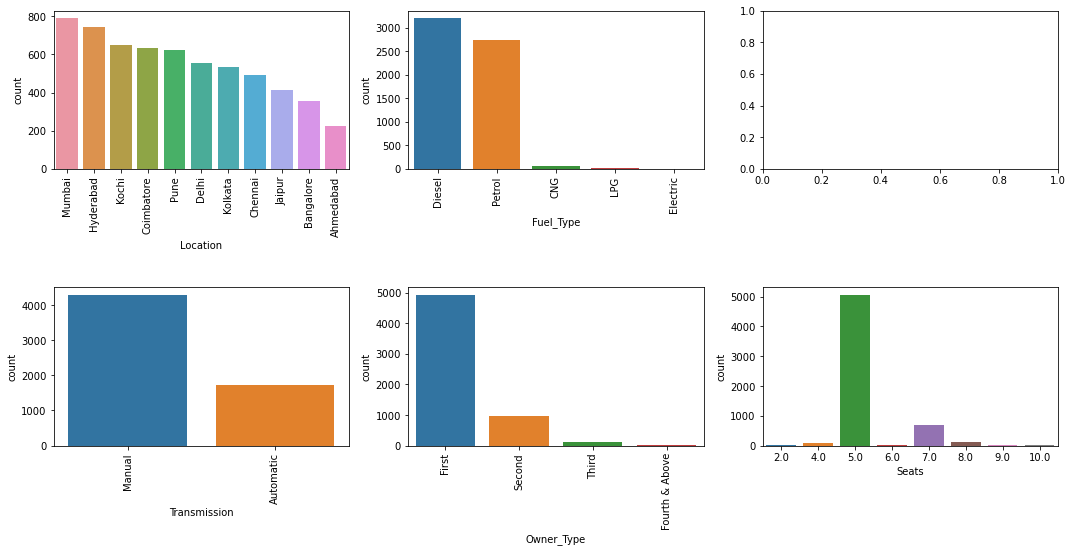

In [45]:
# Create a figure with 5 subplots
fig, ax = plt.subplots(2,3, figsize=(18, 8))
fig.subplots_adjust(hspace=0.75)

# Plot the number of times it entry appears
a = sns.countplot(x='Location', data=df, order = df['Location'].value_counts().index, ax=ax[0][0])
a.set_xticklabels(a.get_xticklabels(), rotation='vertical')
b = sns.countplot(x='Fuel_Type', data=df, order = df['Fuel_Type'].value_counts().index, ax=ax[0][1])
b.set_xticklabels(b.get_xticklabels(), rotation='vertical')
c = sns.countplot(x='Transmission', data=df, ax=ax[1][0])
c.set_xticklabels(c.get_xticklabels(), rotation='vertical')
d = sns.countplot(x='Owner_Type', data=df, order = df['Owner_Type'].value_counts().index, ax=ax[1][1])
d.set_xticklabels(d.get_xticklabels(), rotation='vertical')
e = sns.countplot(x='Seats', data=df, ax=ax[1][2])
d.set_xticklabels(d.get_xticklabels(), rotation='vertical')

plt.show()


- Most of the used cars are being sold in Mumbai, Hyderabad and Kochi
- Fueltype both diesel and petrol are almost equal
- Manual cars are more listed than Automatic cars.
- Most of the listed cars are from first hand owners.
- Cars with 5 seats are dominant.

### Analysis of features with reference to price

#### Price vs Kilometers_Driven

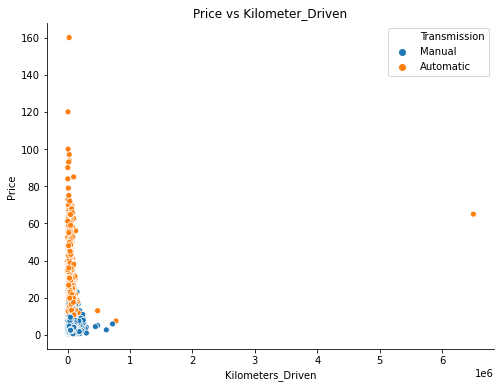

In [46]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Kilometers_Driven', y = 'Price',  data = df, hue = df['Transmission'])
plt.title('Price vs Kilometer_Driven')
sns.despine()

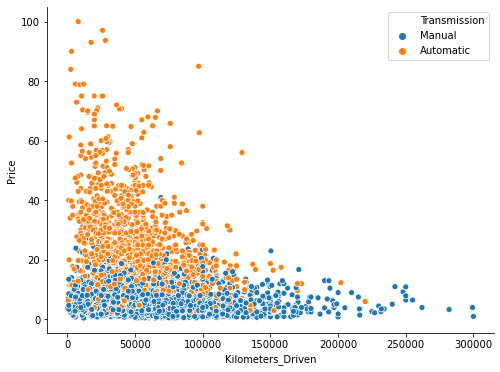

In [47]:
# Try not to include outliers (KM driven > 400000 and Price > 120)
dfa = df[(df['Kilometers_Driven'] < 400000)&(df['Price'] < 120)]
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Kilometers_Driven', y = 'Price', data = dfa, hue = dfa['Transmission'])
sns.despine()
plt.show()

From above plot, we can see that automatic cars are more expensive than manual cars and cars with less Kilometers_Driven cost more.

#### Analysis of other features with reference to Price

[Text(0, 0, '2.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '9.0')]

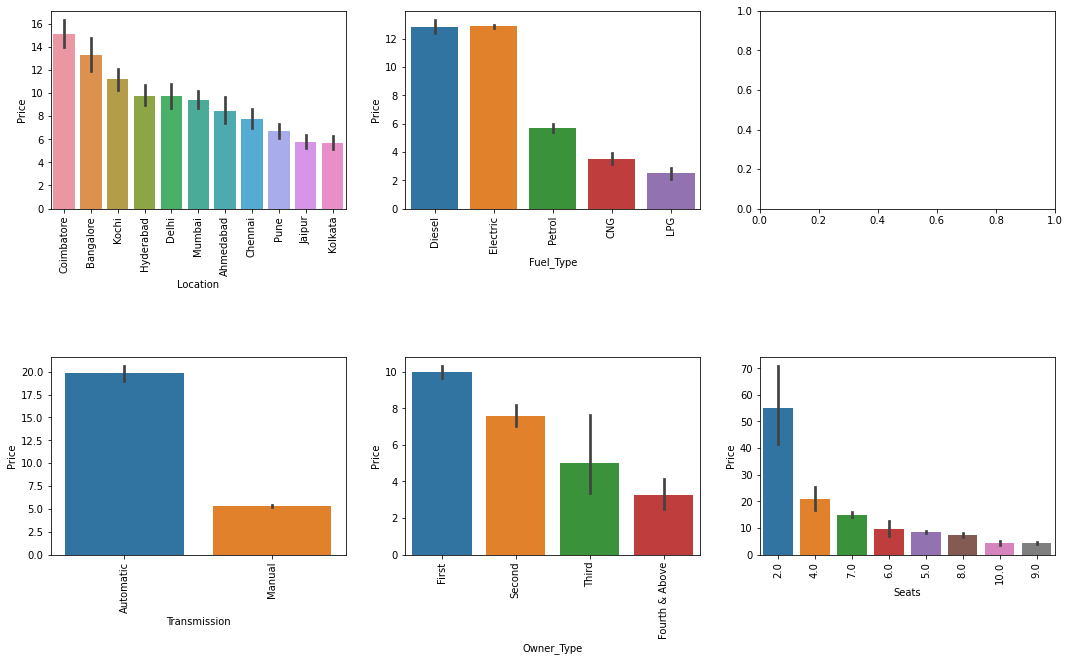

In [48]:
# Create a figure with 4 subplots
fig, ax = plt.subplots(2,3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.75)

# Graph each categorical feature with reference to the Price

a = sns.barplot(x='Location', y='Price', data=df, order = ['Coimbatore', 'Bangalore', 'Kochi', 'Hyderabad', 'Delhi', 'Mumbai', 'Ahmedabad', 'Chennai', 'Pune', 'Jaipur', 'Kolkata'], ax=ax[0][0])
a.set_xticklabels(a.get_xticklabels(), rotation='vertical')

b = sns.barplot('Fuel_Type', 'Price', data=df, order = ["Diesel", "Electric", "Petrol", "CNG", "LPG"], ax=ax[0][1])
b.set_xticklabels(b.get_xticklabels(), rotation='vertical')

b = sns.barplot('Transmission', 'Price', data=df, order = ["Automatic", "Manual"], ax=ax[1][0])
b.set_xticklabels(b.get_xticklabels(), rotation='vertical')

d = sns.barplot('Owner_Type', 'Price', data=df, order = ["First", "Second", "Third", "Fourth & Above"], ax=ax[1][1])
d.set_xticklabels(d.get_xticklabels(), rotation='vertical')

e = sns.barplot('Seats', 'Price', data=df, order = [2.0, 4.0, 7.0, 6.0, 5.0, 8.0, 10.0, 9.0], ax=ax[1][2])
e.set_xticklabels(e.get_xticklabels(), rotation='vertical')

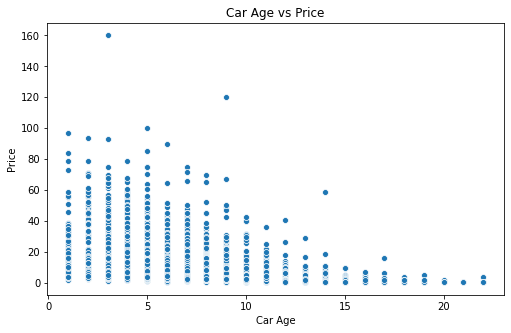

In [49]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(x='Year_Age', y="Price", data=df)
ax1.set_xlabel('Car Age')
ax1.set_ylabel('Price')
ax1.set_title('Car Age vs Price')

plt.show()

**Conclusion of the above features :**
- Used cars from Coimbatore have higher price than other cars origin in dataset
- Cars ranging between the years 2012 to 2019 (age 1-8) cost more.
- Diesel and electric cars are more costly.
- Automatic cars cost more than manual cars.
- First-hand cars are costly followed by second-hand.

### Convert Categorical into Numerical

#### Feature 'Location'

In [50]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

One hot encoding

In [51]:
df_Location = pd.get_dummies(df.Location, prefix='Location')
df_Location.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [52]:
df = pd.concat([df, df_Location], axis=1)
df = df.drop('Location', axis=1)

In [53]:
pd.set_option('max_columns', 100)

In [54]:
df.head(2)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,10,0,0,0,0,0,0,0,0,0,1,0
1,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,5,0,0,0,0,0,0,0,0,0,0,1


#### Feature 'Fuel_Type', 'Transmission', 'Owner_Type'

In [55]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [56]:
df_Fuel_Type = pd.get_dummies(df['Fuel_Type'], prefix = 'Fuel_Type')
df_Fuel_Type.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0


In [57]:
df = df.drop('Fuel_Type', axis=1)

In [58]:
df['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [59]:
df_Transmission = pd.get_dummies(df['Transmission'], prefix = 'Transmission')
df_Transmission.head()

,Transmission_Automatic,Transmission_Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [60]:
df = df.drop('Transmission', axis=1)

In [61]:
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [62]:
# As Owner_Type column has ordered data so we will be using manual Label Encoding
df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)

In [63]:
df = pd.concat([df, df_Fuel_Type, df_Transmission], axis=1)
df.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,72000,1,26.60,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,10,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,41000,1,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,46000,1,18.20,1199,88.70,5.0,4.50,Honda,Jazz V,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,87000,1,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI,8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,40670,2,15.20,1968,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,7,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Feature Brand

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Brand'] = label_encoder.fit_transform(df['Brand'])
df.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,72000,1,26.60,998,58.16,5.0,1.75,18,Wagon R LXI CNG,10,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,41000,1,19.67,1582,126.20,5.0,12.50,10,Creta 1.6 CRDi SX Option,5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,46000,1,18.20,1199,88.70,5.0,4.50,9,Jazz V,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,87000,1,20.77,1248,88.76,7.0,6.00,18,Ertiga VDI,8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,40670,2,15.20,1968,140.80,5.0,17.74,1,A4 New 2.0 TDI Multitronic,7,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Delete unnecessary column

In [65]:
df = df.drop(['Model'], axis=1)

### Price (target column) - Output Analysis

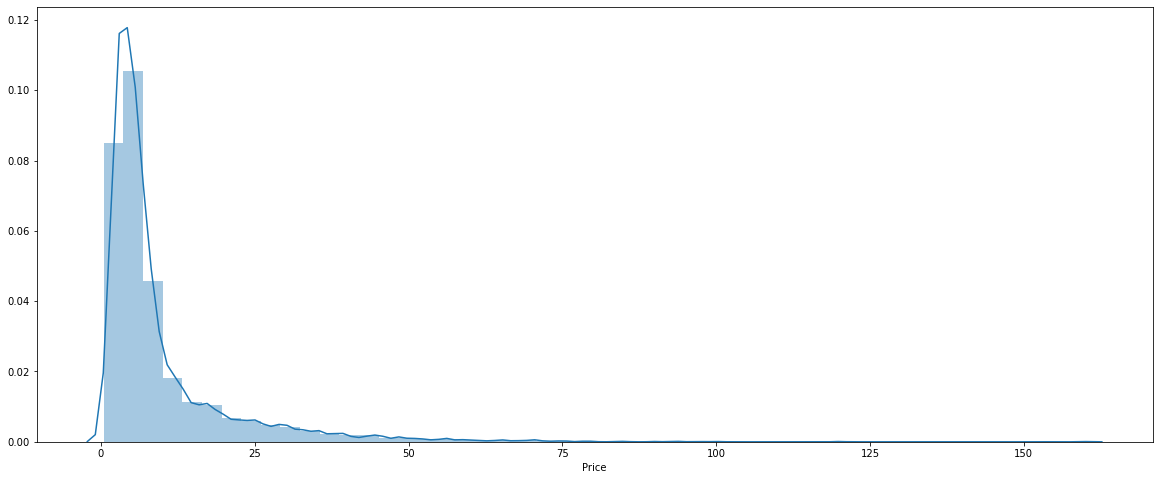

In [66]:
plt.figure(figsize=(20,8))
sns.distplot(df['Price'])

Price column skewed to right, so label is not properly distributed

### Correlation Heatmap

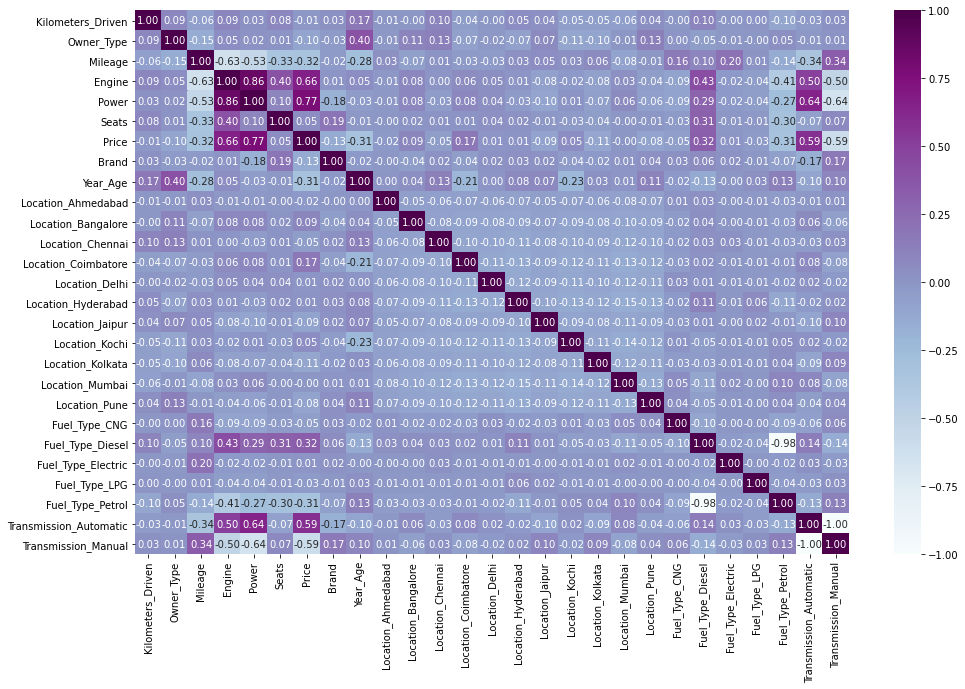

In [67]:
corr_= df[list(df)].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

### Distribution Analysis

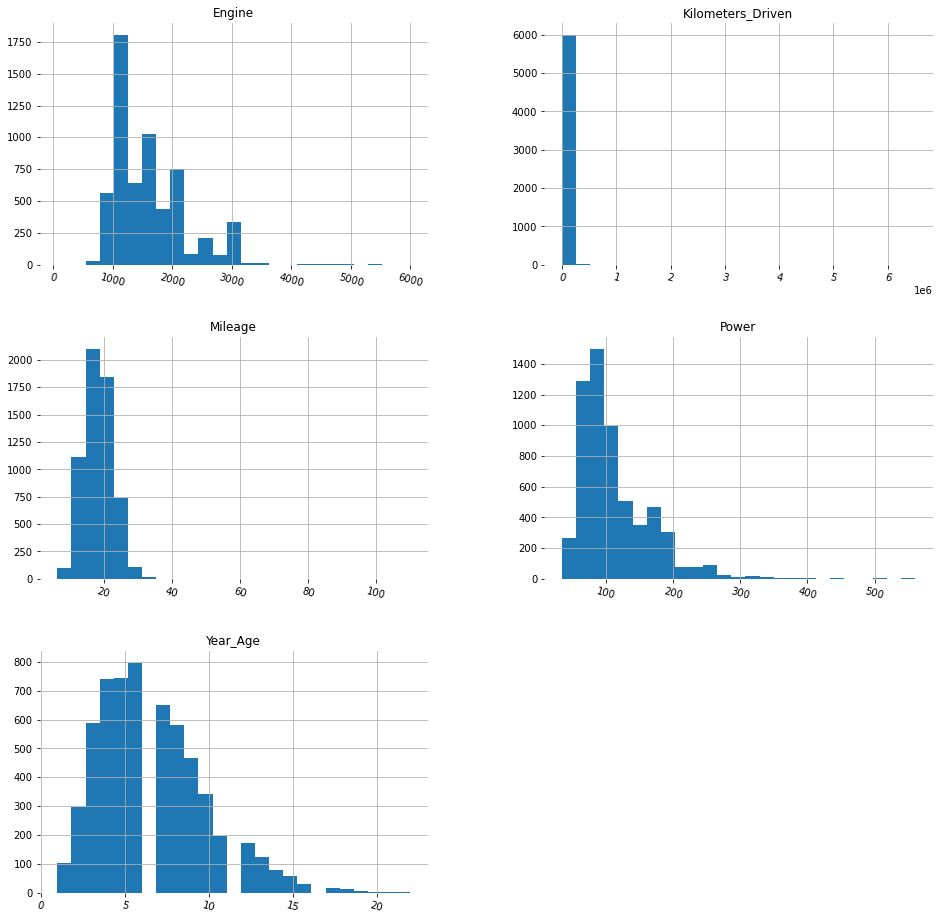

In [68]:
col = ['Engine','Kilometers_Driven','Mileage','Power','Year_Age']
h = df[col].hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

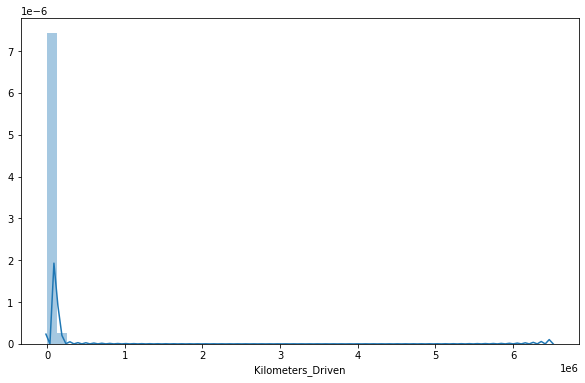

In [69]:
plt.figure(figsize=(10,6))
sns.distplot(df['Kilometers_Driven'])

### Removing Outlier

In [70]:
data_continous = df[['Kilometers_Driven','Mileage','Engine','Power']]

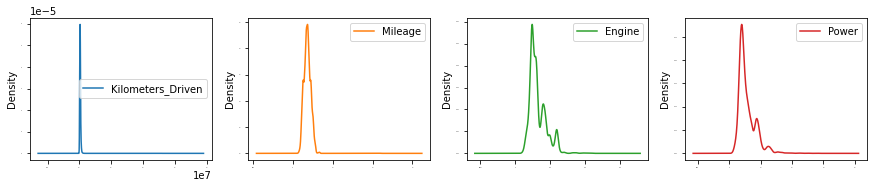

In [71]:
#Density Plot
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

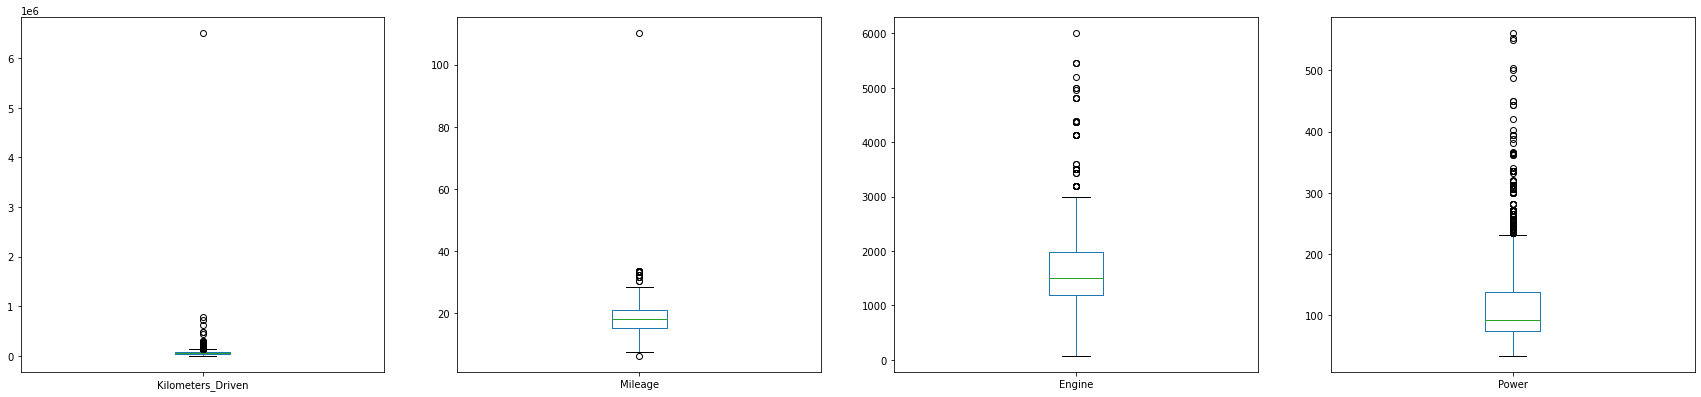

In [72]:
#Box_Plot
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

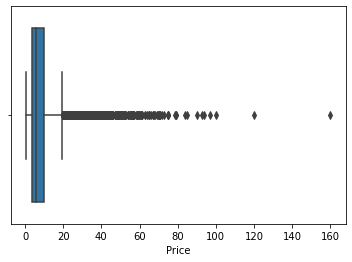

In [73]:
sns.boxplot(df['Price'])
plt.show()
plt.close()

In [74]:
#it will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

In [75]:
#removing outliers 
df_new=df.copy()
out=np.array(['Kilometers_Driven','Mileage','Engine','Power','Price'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)

IQR of Kilometers_Driven = -24500.0 131500.0
IQR of Mileage = 7.099999999999998 29.500000000000004
IQR of Engine = 40.5 3124.5
IQR of Power = -22.045 234.075
IQR of Price = -4.8500000000000005 17.310000000000002


In [76]:
df.shape

(6019, 27)

In [77]:
df_new.shape

(4925, 27)

In [78]:
df_new.head(10)

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Year_Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,72000,1,26.60,998,58.16,5.0,1.75,18,10,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,41000,1,19.67,1582,126.20,5.0,12.50,10,5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,46000,1,18.20,1199,88.70,5.0,4.50,9,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,87000,1,20.77,1248,88.76,7.0,6.00,18,8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,75000,1,21.10,814,55.20,5.0,2.35,10,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
6,86999,1,23.08,1461,63.10,5.0,3.50,22,7,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
8,64430,1,20.54,1598,103.60,5.0,5.20,29,7,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
9,65932,2,22.30,1248,74.00,5.0,1.95,27,8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10,25692,1,21.56,1462,103.25,5.0,9.95,18,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
11,60000,1,16.80,1497,116.30,5.0,4.49,9,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


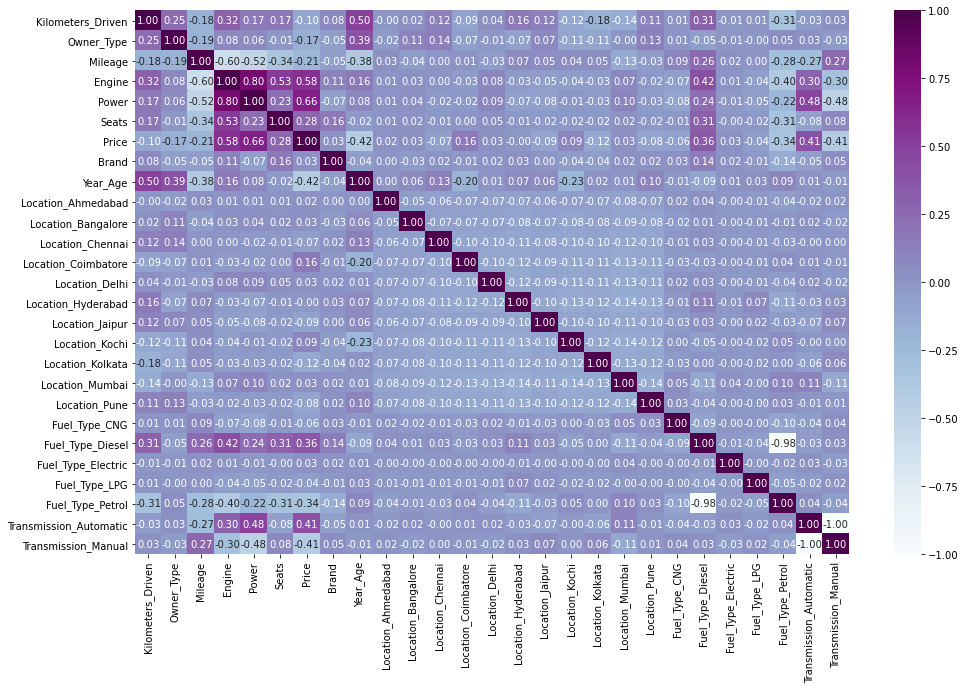

In [79]:
corr_= df_new[list(df_new)].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

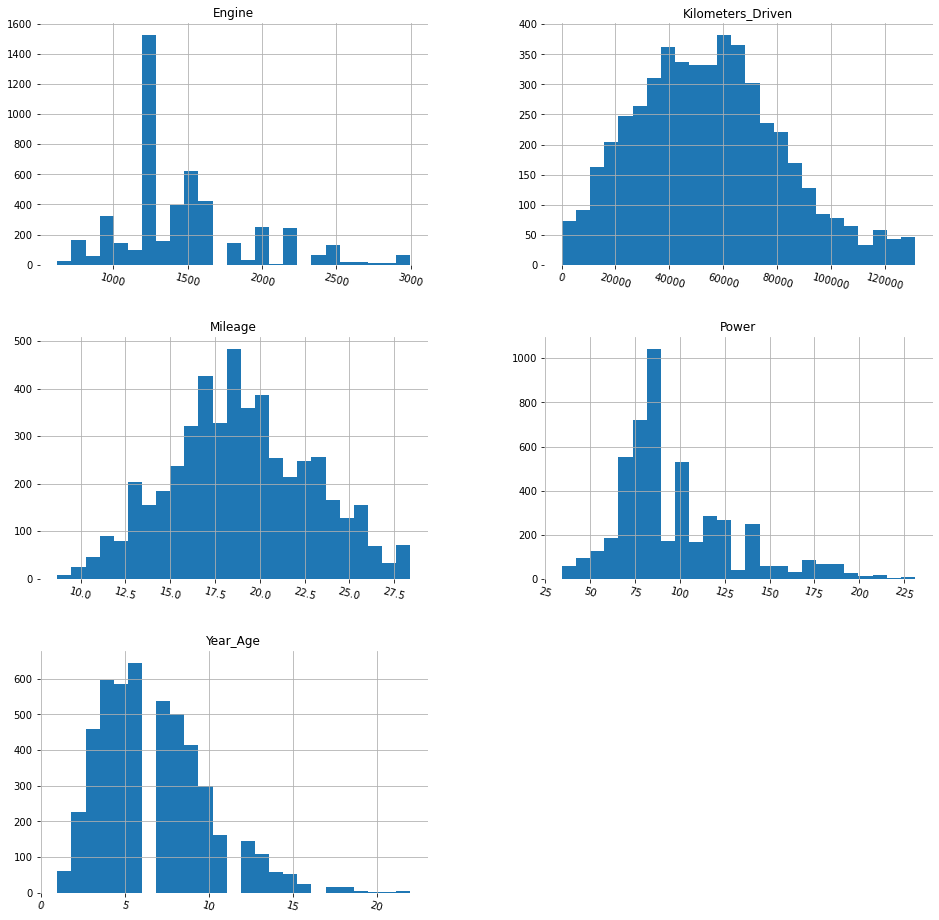

In [80]:
col = ['Engine','Kilometers_Driven','Mileage','Power','Year_Age']
h = df_new[col].hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

### Transform some data

In [81]:
# df_new['Engine'] = np.log1p(df_new['Engine'])
# df_new['Kilometers_Driven'] = np.sqrt(df_new['Kilometers_Driven'])
# df_new['Mileage'] = np.log1p(df_new['Mileage'])
# df_new['Power'] = np.log1p(df_new['Power'])
# df_new['Year'] = np.log1p(df_new['Year'])

### Scaling Feature

In [82]:
from sklearn.preprocessing import StandardScaler
# X = df_new.drop(['Price'], axis=1)
# y = df_new['Price']
# sc_x = StandardScaler()
# X = sc_x.fit_transform(X)

df_std = df_new.copy()
col  = ['Kilometers_Driven','Mileage','Engine','Power','Brand','Year_Age','Seats','Owner_Type']
features = df_std[col]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_std[col] = features
df_std.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Year_Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0.628870,-0.443822,1.936787,-1.044342,-1.155364,-0.335968,1.75,0.304152,0.994207,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,-0.513448,-0.443822,0.181514,0.280088,0.884043,-0.335968,12.50,-0.765334,-0.542374,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,-0.329203,-0.443822,-0.190816,-0.588503,-0.239969,-0.335968,4.50,-0.899020,0.686891,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1.181605,-0.443822,0.460129,-0.477377,-0.238171,2.412606,6.00,0.304152,0.379574,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,0.739417,-0.443822,0.543713,-1.461629,-1.244086,-0.335968,2.35,-0.765334,0.379574,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [83]:
X = df_std.drop(['Price'], axis=1)
y = np.log1p(df_new['Price']) # 

# Sampling Dataset

In [84]:
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from yellowbrick.regressor import AlphaSelection
from math import sqrt
from scipy.stats import randint as sp_randint

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Modeling

## Modelling Summary

In [86]:
lin_reg = LinearRegression().fit(X_train,y_train)
lin_reg_pred = lin_reg.predict(X_test)

RF_reg = RandomForestRegressor(n_estimators = 50,random_state=42).fit(X_train,y_train)
RF_reg_pred = RF_reg.predict(X_test)

svr = SVR(gamma = 'scale').fit(X_train,y_train)
svr_pred = svr.predict(X_test)

DT_reg = DecisionTreeRegressor().fit(X_train,y_train)
DTree_pred = DT_reg.predict(X_test)

Ex_reg = ExtraTreesRegressor(n_estimators= 50,random_state=42).fit(X_train,y_train)
Ex_reg_pred = Ex_reg.predict(X_test)

print('Mean absolute error of  Linear Regression = ', mean_absolute_error(np.expm1(y_test),np.expm1(lin_reg_pred)))
print('Mean absolute error of  Decision Tree = ', mean_absolute_error(np.expm1(y_test),np.expm1(DTree_pred)))
print('Mean absolute error for SVR = ', mean_absolute_error(np.expm1(y_test),np.expm1(svr_pred)))
print('Mean absolute error of Random Forest = ', mean_absolute_error(np.expm1(y_test),np.expm1(RF_reg_pred)))
print('Mean absolute error of Extra Trees = ', mean_absolute_error(np.expm1(y_test),np.expm1(Ex_reg_pred)))

Mean absolute error of  Linear Regression =  1.0824574620422895
Mean absolute error of  Decision Tree =  1.0521329211820196
Mean absolute error for SVR =  0.8451893343196527
Mean absolute error of Random Forest =  0.7748416984512909
Mean absolute error of Extra Trees =  0.766916178118521


In [87]:
print('Root mean squared error of  Linear Regression = ', sqrt(mean_squared_error(np.expm1(y_test),np.expm1(lin_reg_pred))))
print('Root mean squared error of  Decision Tree = ', sqrt(mean_squared_error(np.expm1(y_test),np.expm1(DTree_pred))))
print('Root mean squared error for SVR = ', sqrt(mean_squared_error(np.expm1(y_test),np.expm1(svr_pred))))
print('Root mean squared error of Random Forest = ', sqrt(mean_squared_error(np.expm1(y_test),np.expm1(RF_reg_pred))))
print('Root mean squared error of Extra Trees = ', sqrt(mean_squared_error(np.expm1(y_test),np.expm1(Ex_reg_pred))))

Root mean squared error of  Linear Regression =  1.6216306745624955
Root mean squared error of  Decision Tree =  1.6925868775223405
Root mean squared error for SVR =  1.3399144839676254
Root mean squared error of Random Forest =  1.1873382935624837
Root mean squared error of Extra Trees =  1.2034358936661564


## Linear Regression

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg_pred = lin_reg.predict(X_test)

In [89]:
print('Intercept:', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)
print('Mean absolute error of  Linear Regression (in linear scale) = ', mean_absolute_error(np.expm1(y_test),np.expm1(lin_reg_pred)))
print('Root mean squared error of  Linear Regression (in linear scale) = ', sqrt(mean_squared_error(np.expm1(y_test),np.expm1(lin_reg_pred))))

Intercept: 2.0291231702036443
Coefficients: 
 [-4.95879080e-02 -2.77874346e-02 -1.42725419e-02  8.49638168e-02
  2.26529013e-01  1.27664399e-02 -1.62128199e-03 -2.61060200e-01
  2.30794799e-02  1.05644828e-01  1.13666661e-02  1.09020693e-01
 -4.49200808e-02  8.34834304e-02 -2.37499133e-02  7.31399926e-04
 -1.91325675e-01 -5.17702708e-02 -2.15605581e-02 -2.36431048e-01
 -1.04368198e-01  8.47058382e-01 -2.34988740e-01 -2.71270396e-01
  6.40475938e-02 -6.40475938e-02]
Mean absolute error of  Linear Regression (in linear scale) =  1.0824574620422895
Root mean squared error of  Linear Regression (in linear scale) =  1.6216306745624955


In [90]:
df_new['Price'].describe()

count    4925.000000
mean        5.769431
std         3.490303
min         0.440000
25%         3.250000
50%         4.950000
75%         7.300000
max        17.270000
Name: Price, dtype: float64

In [91]:
df_LR_pred = pd.DataFrame({'predicted':np.expm1(lin_reg_pred),'actual':np.expm1(y_test)})
print(len(df_LR_pred))
df_LR_pred.head()

1478


,predicted,actual
2066,7.377813,6.95
4391,3.991669,3.75
3369,4.183830,3.75
2953,4.394085,3.20
868,5.816574,5.57


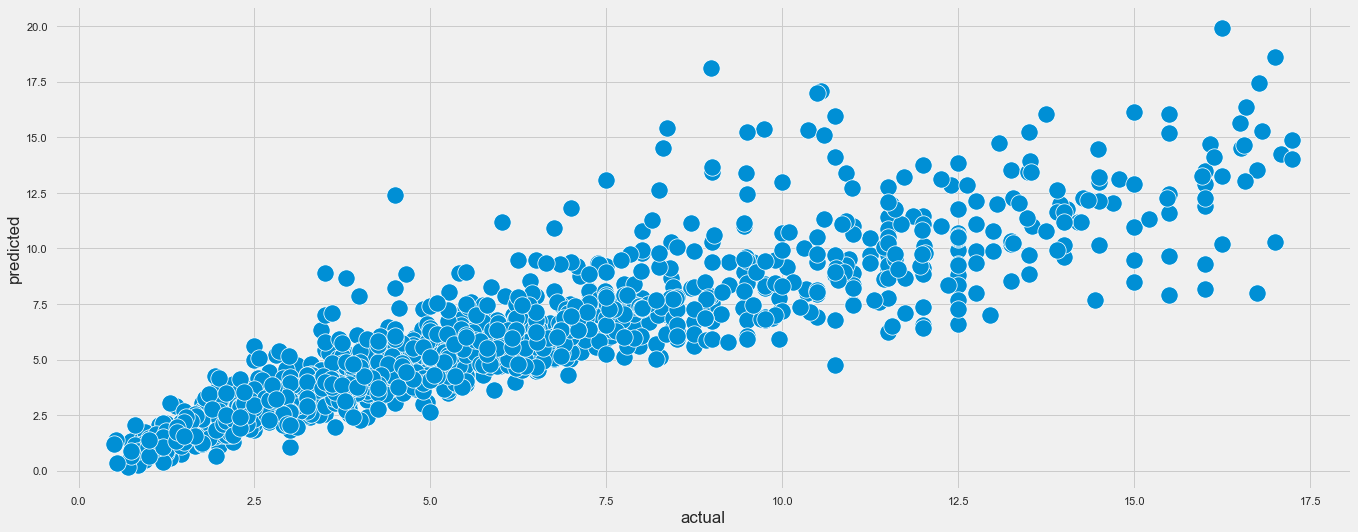

In [97]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
sns.scatterplot(x='actual', y='predicted', data=df_LR_pred, s=300)

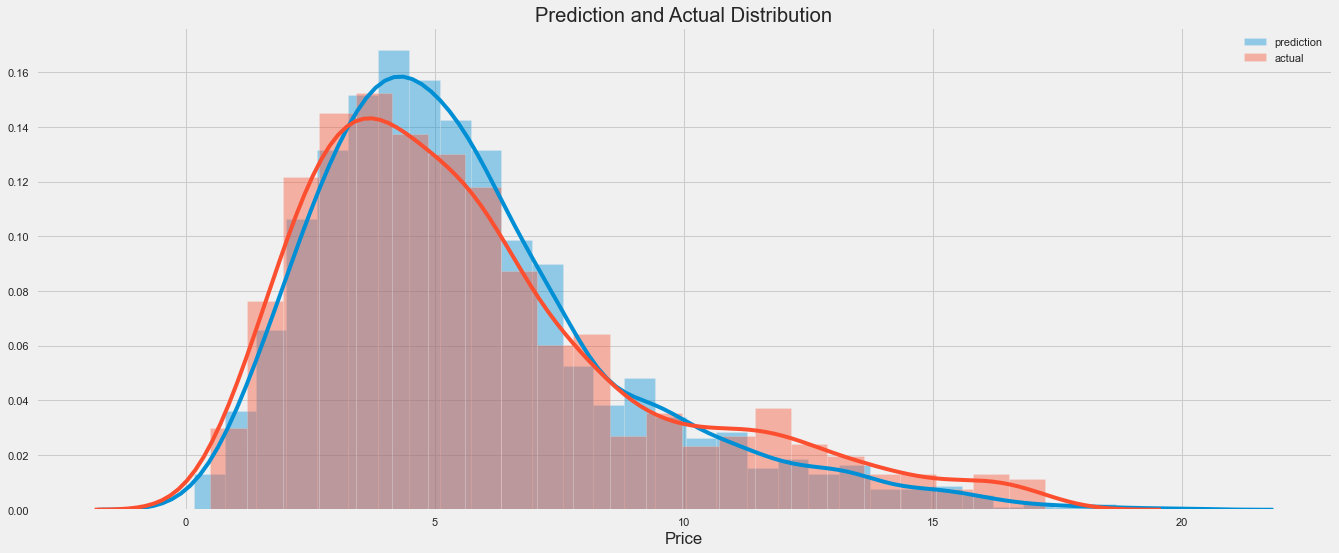

In [98]:
sns.distplot(df_LR_pred['predicted'], label='prediction')
sns.distplot(df_LR_pred['actual'], label='actual')
plt.title("Prediction and Actual Distribution")
plt.xlabel("Price")
plt.legend()

In [99]:
coefficients = pd.concat([pd.DataFrame({'Features':X.columns}),pd.DataFrame({'Coefficent':np.transpose(lin_reg.coef_)})], axis = 1)

In [100]:
coefficients

,Features,Coefficent
0,Kilometers_Driven,-0.049588
1,Owner_Type,-0.027787
2,Mileage,-0.014273
3,Engine,0.084964
4,Power,0.226529
5,Seats,0.012766
6,Brand,-0.001621
7,Year_Age,-0.261060
8,Location_Ahmedabad,0.023079
9,Location_Bangalore,0.105645


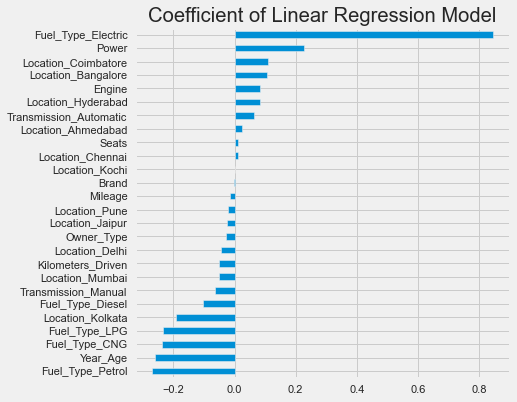

In [101]:
#Ploting coefficent graph
coef = pd.Series(lin_reg.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficient of Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

## Random Forest Regression

### Hyperparameter

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
random_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [104]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs = -1)

In [105]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 50, 100, 200,
                                                         400, 600, 800, 1000,
                                                         1200, 1400, 1600, 1800,
                                                         2000]},
                   random_state=42, verbose=3)

In [106]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80}

In [107]:
RF_reg = RandomForestRegressor(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 80).fit(X_train,y_train)
RF_reg_pred = RF_reg.predict(X_test)

In [108]:
print('Mean absolute error of  Random Forest Regression (in linear scale) = ', mean_absolute_error(np.expm1(y_test),np.expm1(RF_reg_pred)))
print('Root mean squared error of  Random Forest Regression (in linear scale) = ', sqrt(mean_squared_error(np.expm1(y_test),np.expm1(RF_reg_pred))))

Mean absolute error of  Random Forest Regression (in linear scale) =  0.786713341597519
Root mean squared error of  Random Forest Regression (in linear scale) =  1.2276963307510336


In [109]:
df_RF_pred = pd.DataFrame({'predicted':np.expm1(RF_reg_pred),'actual':np.expm1(y_test)})
print(len(df_RF_pred))
df_RF_pred.head()

1478


,predicted,actual
2066,7.276207,6.95
4391,4.522125,3.75
3369,4.186451,3.75
2953,3.865912,3.20
868,5.762862,5.57


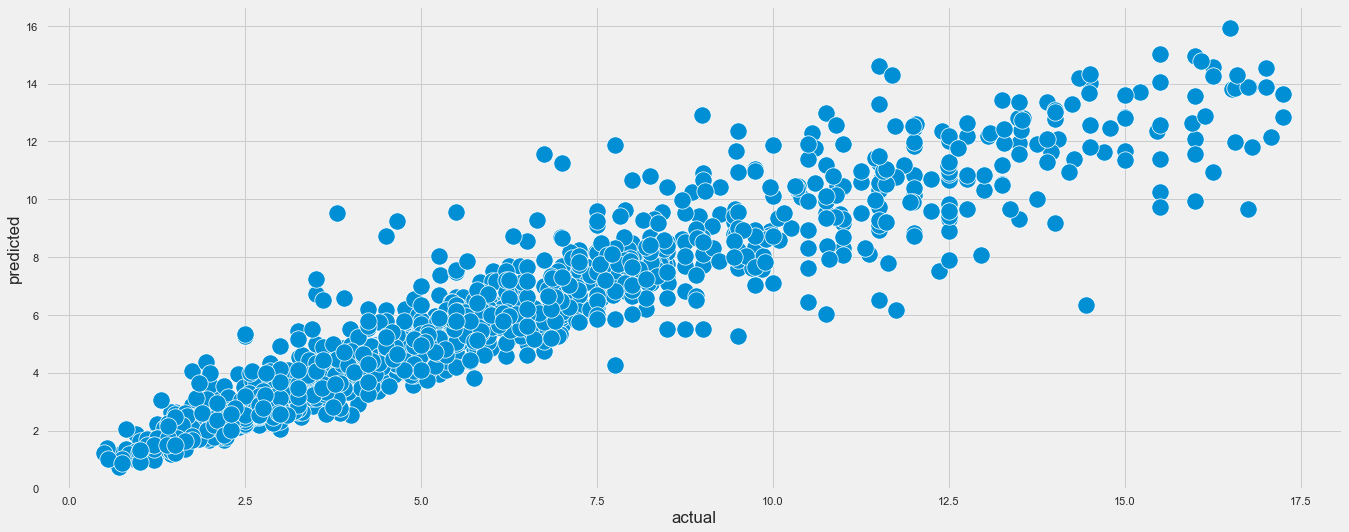

In [110]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
sns.scatterplot(x='actual', y='predicted', data=df_RF_pred, s=300)

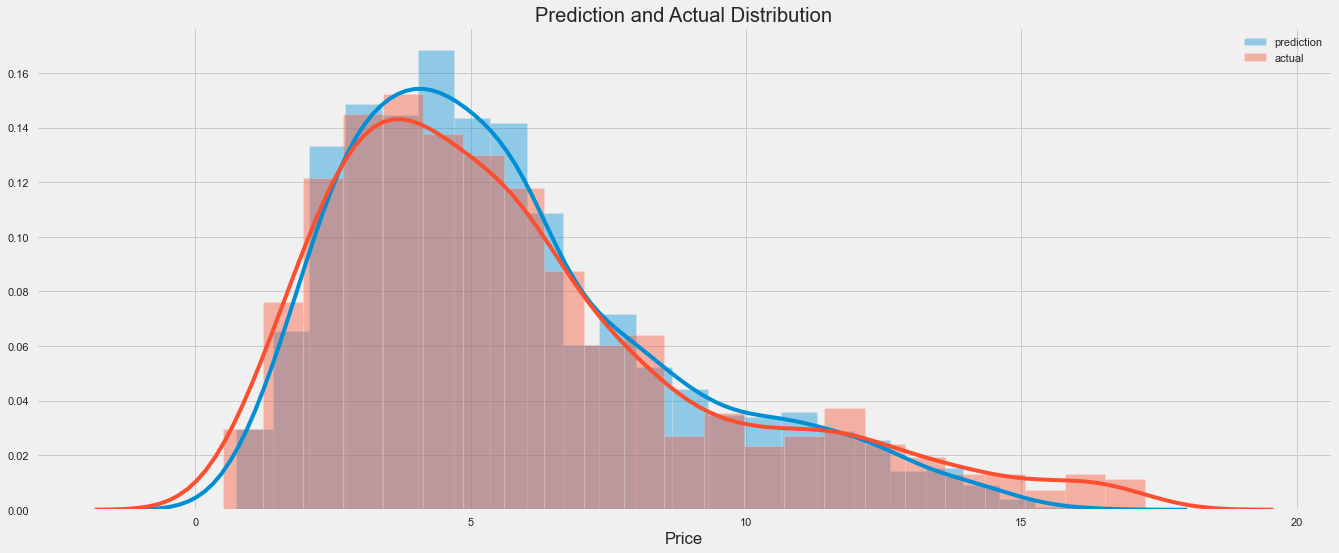

In [111]:
sns.distplot(df_RF_pred['predicted'], label='prediction')
sns.distplot(df_RF_pred['actual'], label='actual')
plt.title("Prediction and Actual Distribution")
plt.xlabel("Price")
plt.legend()

<Figure size 1490.4x595.44 with 0 Axes>

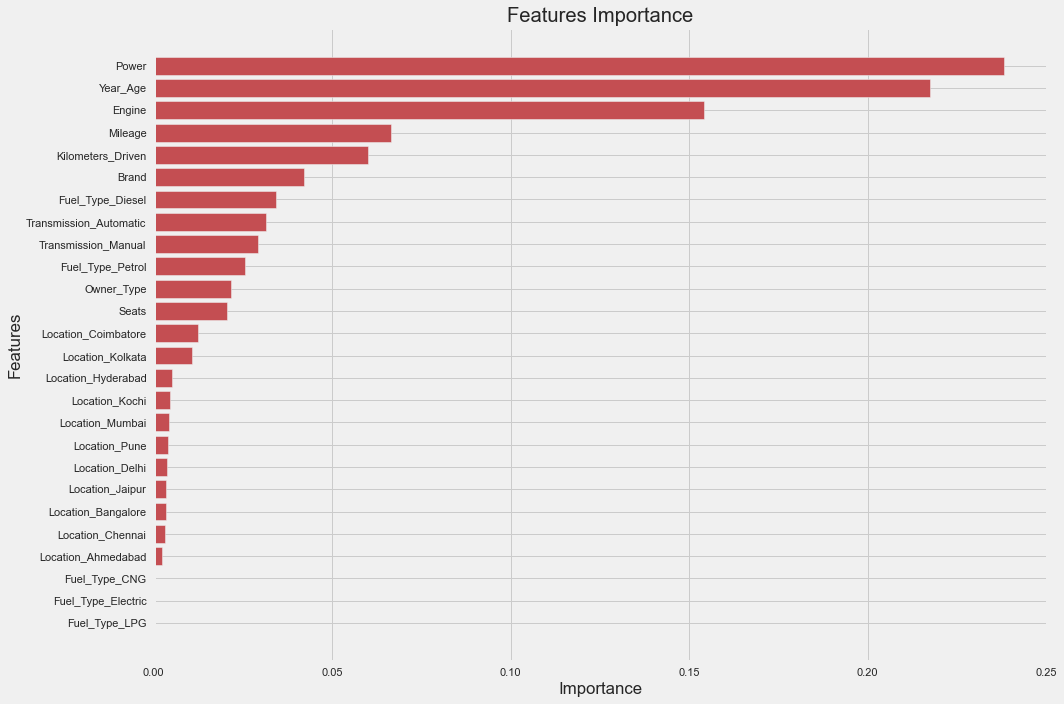

In [112]:
importances=RF_reg.feature_importances_
features=X_train.columns

indices = np.argsort(importances)

plt.figure(1)
plt.figure(figsize=(15,10)) 
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('RFR-Features-Importance.jpg',dpi=60)
plt.show();

In [122]:
df_merge = df_RF_pred.merge(df_initial, left_index=True, right_index=True, how='inner')
df_merge.head(5)

,predicted,actual,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2066,7.276207,6.95,Mahindra TUV 300 T8,Delhi,2016,47035,Diesel,Manual,First,18.49 kmpl,1493 CC,100 bhp,7.0,6.95
4391,4.522125,3.75,Nissan Sunny 2011-2014 Diesel XL,Pune,2013,125600,Diesel,Manual,First,21.64 kmpl,1461 CC,84.8 bhp,5.0,3.75
3369,4.186451,3.75,Hyundai Grand i10 Magna,Kolkata,2016,21000,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,3.75
2953,3.865912,3.20,Honda Amaze S i-Dtech,Kolkata,2013,38755,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,3.20
868,5.762862,5.57,Hyundai Grand i10 AT Asta,Coimbatore,2015,61717,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,5.57


In [123]:
df_merge.loc[df_merge['predicted'] < df_merge['actual']]

,predicted,actual,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1883,4.024310,4.70,Honda CR-V 2.4 MT,Chennai,2007,98000,Petrol,Manual,Second,10.8 kmpl,2354 CC,152 bhp,5.0,4.70
3202,4.292222,4.30,Maruti Swift VDI,Delhi,2014,50000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,4.30
2390,12.084420,14.05,Skoda Superb Elegance 1.8 TSI AT,Kochi,2016,56674,Petrol,Automatic,First,13.7 kmpl,1798 CC,157.75 bhp,5.0,14.05
3407,13.881167,16.77,Mahindra XUV500 AT W10 AWD,Coimbatore,2018,82739,Diesel,Automatic,First,16.0 kmpl,2179 CC,140 bhp,7.0,16.77
2887,5.239830,5.50,Hyundai i20 Asta Option 1.2,Mumbai,2015,39000,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.0,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,11.361333,15.00,BMW 5 Series 2003-2012 520d,Hyderabad,2009,79000,Diesel,Automatic,First,18.48 kmpl,1995 CC,177 bhp,5.0,15.00
69,8.320711,10.50,Hyundai Creta 1.4 E Plus Diesel,Mumbai,2018,13000,Diesel,Manual,First,22.1 kmpl,1396 CC,88.7 bhp,5.0,10.50
1630,10.836820,12.75,Hyundai Creta 1.6 SX Plus Dual Tone Petrol,Mumbai,2018,2500,Petrol,Manual,First,15.29 kmpl,1591 CC,121.3 bhp,5.0,12.75
890,5.218984,6.85,Maruti Swift Dzire ZDI,Bangalore,2014,25789,Diesel,Manual,Second,23.4 kmpl,1248 CC,74 bhp,5.0,6.85


In [124]:
df_merge.loc[df_merge['predicted'] > df_merge['actual']]

,predicted,actual,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2066,7.276207,6.95,Mahindra TUV 300 T8,Delhi,2016,47035,Diesel,Manual,First,18.49 kmpl,1493 CC,100 bhp,7.0,6.95
4391,4.522125,3.75,Nissan Sunny 2011-2014 Diesel XL,Pune,2013,125600,Diesel,Manual,First,21.64 kmpl,1461 CC,84.8 bhp,5.0,3.75
3369,4.186451,3.75,Hyundai Grand i10 Magna,Kolkata,2016,21000,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,3.75
2953,3.865912,3.20,Honda Amaze S i-Dtech,Kolkata,2013,38755,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,3.20
868,5.762862,5.57,Hyundai Grand i10 AT Asta,Coimbatore,2015,61717,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,4.295477,4.25,Maruti Swift Dzire VDI,Kolkata,2014,42109,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,4.25
4496,8.412499,8.25,Mahindra XUV500 W6 2WD,Mumbai,2014,45600,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,8.25
5750,7.166165,6.50,Nissan Terrano XL Plus ICC WT20 SE,Mumbai,2016,37000,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,6.50
2424,4.704515,3.90,Hyundai i20 Magna 1.4 CRDi (Diesel),Jaipur,2013,51873,Diesel,Manual,First,21.9 kmpl,1396 CC,88.76 bhp,5.0,3.90


In [113]:
RF_reg

RandomForestRegressor(max_depth=80, max_features='sqrt', n_estimators=800)

Failed to import duecredit due to No module named 'duecredit'


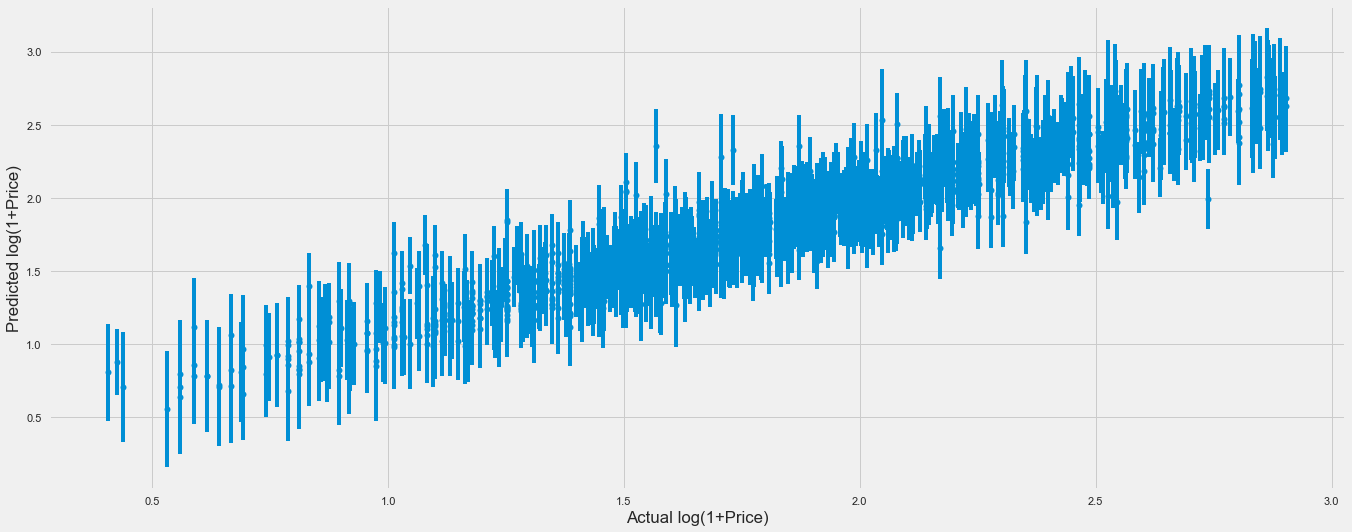

In [114]:
import forestci as fci

# Calculate the variance
price_V_IJ_unbiased = fci.random_forest_error(RF_reg, X_train, X_test)

# Plot error bars for predicted log(1+Price) using unbiased variance
plt.errorbar(y_test,RF_reg_pred, yerr=np.sqrt(price_V_IJ_unbiased), fmt='o')
plt.xlabel('Actual log(1+Price)')
plt.ylabel('Predicted log(1+Price)')
plt.show()

In [115]:
rfci=np.sqrt(price_V_IJ_unbiased)
rfci

array([0.21901503, 0.20908285, 0.21608521, ..., 0.20847642, 0.2083802 ,
       0.20643747])

In [116]:
rfci_inv = np.expm1(rfci)
rfci_inv

array([0.24484999, 0.23254711, 0.24120813, ..., 0.23179988, 0.23168137,
       0.22929086])

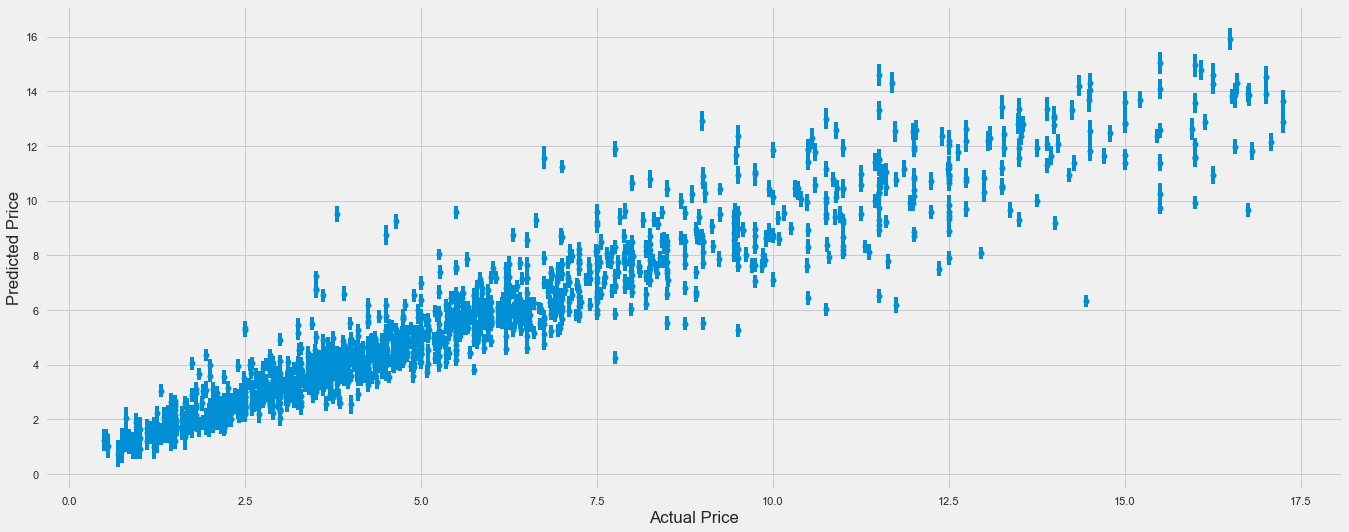

In [117]:
# Plot error bars for predicted Price using unbiased variance
plt.errorbar(np.expm1(y_test),np.expm1(RF_reg_pred), yerr=rfci_inv, fmt='o')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [118]:
pred =  df_RF_pred.reset_index(drop=True)

In [119]:
rfe = pd.concat([pred,pd.DataFrame({'error':rfci})], axis = 1)

In [120]:
rfe['lower'] = rfe['predicted'] - rfe['error']
rfe['upper'] = rfe['predicted'] + rfe['error']
rfe[['lower','predicted','upper','actual']].sample(n=5)

,lower,predicted,upper,actual
428,6.244200,6.486389,6.728577,7.25
1013,9.185366,9.432659,9.679952,12.50
1001,3.572290,3.789209,4.006128,3.55
1333,2.453153,2.668308,2.883463,2.40
1085,10.228962,10.518307,10.807651,11.60


In [125]:
rfe.head()

,predicted,actual,error,lower,upper
0,7.276207,6.95,0.219015,7.057192,7.495222
1,4.522125,3.75,0.209083,4.313042,4.731208
2,4.186451,3.75,0.216085,3.970366,4.402536
3,3.865912,3.20,0.210634,3.655278,4.076546
4,5.762862,5.57,0.211062,5.551800,5.973925


In [126]:
merge = df_merge.reset_index(drop=True)

In [127]:
new = pd.concat([merge,pd.DataFrame({'error':rfci})], axis = 1)

In [128]:
new['lower'] = new['predicted'] - new['error']
new['upper'] = new['predicted'] + new['error']

In [129]:
new.head()

,predicted,actual,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,error,lower,upper
0,7.276207,6.95,Mahindra TUV 300 T8,Delhi,2016,47035,Diesel,Manual,First,18.49 kmpl,1493 CC,100 bhp,7.0,6.95,0.219015,7.057192,7.495222
1,4.522125,3.75,Nissan Sunny 2011-2014 Diesel XL,Pune,2013,125600,Diesel,Manual,First,21.64 kmpl,1461 CC,84.8 bhp,5.0,3.75,0.209083,4.313042,4.731208
2,4.186451,3.75,Hyundai Grand i10 Magna,Kolkata,2016,21000,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,3.75,0.216085,3.970366,4.402536
3,3.865912,3.20,Honda Amaze S i-Dtech,Kolkata,2013,38755,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,3.20,0.210634,3.655278,4.076546
4,5.762862,5.57,Hyundai Grand i10 AT Asta,Coimbatore,2015,61717,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,5.57,0.211062,5.551800,5.973925


In [132]:
new.loc[new['upper'] < new['actual']]

,predicted,actual,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,error,lower,upper
8,4.024310,4.70,Honda CR-V 2.4 MT,Chennai,2007,98000,Petrol,Manual,Second,10.8 kmpl,2354 CC,152 bhp,5.0,4.70,0.228375,3.795934,4.252685
11,12.084420,14.05,Skoda Superb Elegance 1.8 TSI AT,Kochi,2016,56674,Petrol,Automatic,First,13.7 kmpl,1798 CC,157.75 bhp,5.0,14.05,0.297885,11.786534,12.382305
12,13.881167,16.77,Mahindra XUV500 AT W10 AWD,Coimbatore,2018,82739,Diesel,Automatic,First,16.0 kmpl,2179 CC,140 bhp,7.0,16.77,0.354282,13.526885,14.235449
13,5.239830,5.50,Hyundai i20 Asta Option 1.2,Mumbai,2015,39000,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.0,5.50,0.209992,5.029838,5.449822
14,3.816096,5.75,Toyota Corolla Altis Aero D 4D J,Pune,2011,116000,Diesel,Manual,Second,21.43 kmpl,1364 CC,138 bhp,5.0,5.75,0.191558,3.624538,4.007655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,11.361333,15.00,BMW 5 Series 2003-2012 520d,Hyderabad,2009,79000,Diesel,Automatic,First,18.48 kmpl,1995 CC,177 bhp,5.0,15.00,0.221059,11.140274,11.582392
1469,8.320711,10.50,Hyundai Creta 1.4 E Plus Diesel,Mumbai,2018,13000,Diesel,Manual,First,22.1 kmpl,1396 CC,88.7 bhp,5.0,10.50,0.233138,8.087573,8.553850
1470,10.836820,12.75,Hyundai Creta 1.6 SX Plus Dual Tone Petrol,Mumbai,2018,2500,Petrol,Manual,First,15.29 kmpl,1591 CC,121.3 bhp,5.0,12.75,0.317748,10.519072,11.154568
1471,5.218984,6.85,Maruti Swift Dzire ZDI,Bangalore,2014,25789,Diesel,Manual,Second,23.4 kmpl,1248 CC,74 bhp,5.0,6.85,0.206379,5.012604,5.425363
